# Loading Data, Computing Metrics

Install Datasets library

In [1]:
!pip install datasets transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 13.8 MB/s eta 0:00:00


The STS Benchmark is a compilation of English language datasets utilized in the STS tasks of SemEval competitions that took place from 2012 to 2017. The dataset selection covers various text genres, including image captions, news headlines, and user forums. [ref](http://ixa2.si.ehu.eus/stswiki/index.php/STSbenchmark)

Loading dataset and Metric

In [2]:
from datasets import load_dataset, load_metric
import numpy as np

In [3]:
task = "stsb"

In [4]:
dataset = load_dataset("glue", task)
metric = load_metric('glue', task)

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/stsb/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-4-c91d69005843>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('glue', task)


View Dataset

In [5]:
print("Sample from the train, validation and test dataset:")
# Train Dataset
print("Train Sample",dataset["train"][0])
# Valid Dataset
print("Validation Sample",dataset["validation"][0])
# Test Dataset
# Label of test set is -1
print("Test Sample",dataset["test"][0])

print("\nSamples in dataset:")
# Train Dataset
print("Train Sample",len(dataset["train"]))
# Valid Dataset
print("Validation Sample",len(dataset["validation"]))
# Test Dataset
print("Test Sample",len(dataset["test"]))

Sample from the train, validation and test dataset:
Train Sample {'sentence1': 'A plane is taking off.', 'sentence2': 'An air plane is taking off.', 'label': 5.0, 'idx': 0}
Validation Sample {'sentence1': 'A man with a hard hat is dancing.', 'sentence2': 'A man wearing a hard hat is dancing.', 'label': 5.0, 'idx': 0}
Test Sample {'sentence1': 'A girl is styling her hair.', 'sentence2': 'A girl is brushing her hair.', 'label': -1.0, 'idx': 0}

Samples in dataset:
Train Sample 5749
Validation Sample 1500
Test Sample 1379


In [6]:
import datasets
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))


In [7]:
show_random_elements(dataset["train"])

,sentence1,sentence2,label,idx
0,FAA continues ban on US flights to Tel Aviv,FAA lifts ban on U.S. flights to Tel Aviv,1.8,5534
1,Iranian nuclear talks to be extended to November,Iran nuclear talks extended to November 24,4.4,5445
2,"Shooting, protests mar Thai voting",Thai protesters disrupt advance voting,3.6,5045
3,A woman posing in front of an apartment building in the snow.,A woman stands in front of a building in the snow.,4.4,1078
4,Two dogs are running on the grass.,Two dogs running in the dirt,3.6,1807
5,"Their contract will expire at 12:01 a.m. Wednesday instead of 12:01 a.m. Sunday, said Rian Wathen, organizing director for United Food and Commercial Workers Local 700.","""It has outraged the membership,"" said Rian Wathen, organizing director of United Food and Commercial Workers Local 700.",2.5,2608
6,"""Gorgons don't exist"" - fine.","""Satyrs don't exist"" - fine.",2.0,2095
7,Obama relaxes deportation rules for young immigrants,U.S. relaxes deportation rules for young people: Napolitano,4.0,4136
8,And the simple fact today?,I repeat: And the simple fact today?,4.0,2101
9,A man and a woman holding hands walking along the beach.,A man with a beard and a skullcap and a boy walk along the ocean's shore.,2.2,1260


Compute Pearson correlation coefficient and Spearman's rank correlation coefficient

In [8]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions
    return metric.compute(predictions=predictions, references=labels)

In [10]:
import numpy as np

# Predictions and labels between 0 and 5
fake_preds = np.random.randint(0, 6, size=(64,))
fake_labels = np.random.randint(0, 6, size=(64,))
print(fake_preds)
print(fake_labels)
metric.compute(predictions=fake_preds, references=fake_labels)

[2 3 1 3 0 1 1 3 1 3 3 5 2 4 2 0 1 5 3 5 5 0 2 5 4 2 4 1 1 3 2 1 2 0 2 4 3
 5 1 0 5 5 4 5 2 5 0 4 0 1 3 2 3 4 2 0 1 3 2 1 1 2 0 3]
[2 4 5 1 4 4 5 3 3 3 1 0 1 2 2 4 0 0 4 5 1 4 1 5 1 5 1 1 5 2 5 3 5 0 4 5 3
 2 5 0 1 0 2 5 1 3 3 3 3 0 0 5 1 4 4 3 0 0 0 1 5 5 0 3]


{'pearson': -0.0823782423518737, 'spearmanr': -0.07062398404315122}

# Experiments

## Early interaction using BERT tiny
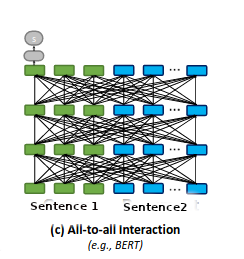

### Finetune a [BERT-tiny](https://huggingface.co/prajjwal1/bert-tiny) model on STSB train set and report scores on the validation set.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, AdamW
from sklearn.metrics import mean_squared_error

# Load the tokenizer and the BERT-tiny model
tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-tiny")
model = AutoModelForSequenceClassification.from_pretrained("prajjwal1/bert-tiny", num_labels=5)

def tokenize_function(data):
    return tokenizer(data["sentence1"], data["sentence2"], padding=True, truncation=True)

# Load the STS-B dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)
train_dataset = tokenized_dataset["train"].shuffle(seed=1).select(range(1000))
val_dataset = tokenized_dataset["validation"].shuffle(seed=1).select(range(1000))

In [32]:
# Train the model
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


ValueError: ignored

## Dynamic Time Warping (DTW) without crossings using cosine simialrity/ euclidean distance

Given a pair of sentences, return optimal map between tokens of two sentences. Should handle degenerate solutions.

## Dynamic Time Warping (DTW) using Tanh Calibration

### Dynamic Time Warping (DTW) without crossings

**Obtain Optimal non-crossing mapping**

---
Let the longer sentence (the sentence with more tokens) be s1 and shorter be s2 and i be an index of token from sentence 1 and j be an index of token from sentence 2.
We can use DP to keep track of score for each mapping i to j. Here we impose that each j must be mapped to i i.e. the tokens of the shorter sentence must be matched to a token of the longer one.

 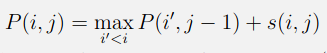

From the scores we can obtain the optimal mapping.


---


To allow some unmatched tokens on both sides, we can exclude the non negative similariy pairs during matching and let it not continute to the aggregate score.

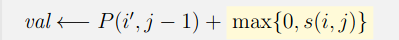


---

Any s(i, j) < 0 debars i from being a candidate for j. While cosine similarity can be positive or negative (in practice, negative cosine similarities are
somewhat rare), the fraction of cases where it is negative in an application may not be
consistent with the number of j we should aim to leave unassigned in the same application.
Also note that d(i, j) ≥ 0 always. If we instead use a notion of distance d(i, j), we need
to either switch the polarity of the dynamic programming recurrence, or use a decreasing
function of distance in the the recurrence. In either case, the check against 0 may become
trivial: no i may be rejected by j, or all is may be rejected. One solution (there may be
others) is to apply a smooth transformation of both s(i, j) and d(i, j) into a space that is
capable of being positive or negative with a distribution that optimizes for the end task,
say:

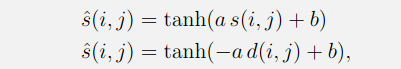

with additional parameters a, b to be trained.


Train a model to learn optimal a and b.

### Dynamic Time Warping (DTW) with crossings

Scoring cross mappings should be easy.


Train a model to learn optimal a and b.

# Results